In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Loading train data

In [4]:
import os
os.chdir('D:/Aegis/Shaadi.com Case study/Saruk_Shaikh_case_study')
df = pd.read_csv('ClassificationProblem1.txt', sep='\t')
df=pd.DataFrame(df)

# Knowing the data:

In [5]:
#small look over the dataset
df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10-04-1986,09-06-1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,01-05-1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,01-12-1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,06-10-1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,04-10-1987,10/19/1985,1,1,486,240,1,1,0


## Dimension of the dataset
data has 101180 rows 
and 24 columns 

In [370]:
df.shape   

(101180, 24)

## Here we can see most of the data is integer and float
But F15 and F16 is a object which are actually date

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101180 entries, 0 to 101179
Data columns (total 24 columns):
Index    101180 non-null int64
F1       101180 non-null float64
F2       101180 non-null float64
F3       101180 non-null float64
F4       101180 non-null float64
F5       101180 non-null int64
F6       101180 non-null int64
F7       101180 non-null int64
F8       101180 non-null int64
F9       101180 non-null int64
F10      101180 non-null int64
F11      101180 non-null int64
F12      101180 non-null int64
F13      101180 non-null int64
F14      101180 non-null int64
F15      101180 non-null object
F16      101180 non-null object
F17      101180 non-null int64
F18      101180 non-null int64
F19      101180 non-null int64
F20      101180 non-null int64
F21      101180 non-null int64
F22      101180 non-null int64
C        101180 non-null int64
dtypes: float64(4), int64(18), object(2)
memory usage: 18.5+ MB


# Checking Null values
There are no null values

In [372]:
df.isnull().sum()

Index    0
F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
F22      0
C        0
dtype: int64

## looking at the distribution of the data
Here we can see there is a class imbalance 

In [8]:
df.describe()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,...,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,50590.500000,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,...,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,29208.294456,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,...,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,1.000000,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25295.750000,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,...,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,50590.500000,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,...,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,75885.250000,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,...,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,101180.000000,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


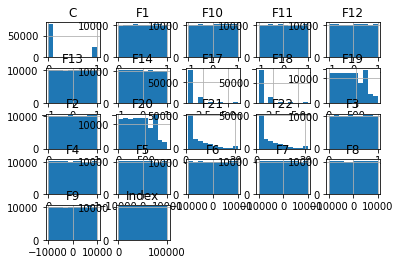

In [9]:
df.hist()
plt.show()

## Clearifying the class imbalance

C1:  76353
C2:  24827


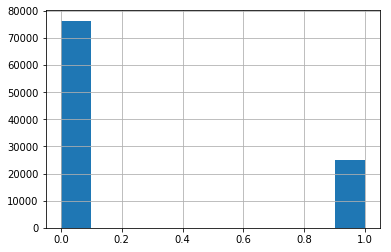

In [374]:
#Here is clearifies the class imbalance 
dfC1 = df[df.C==0]
dfC2 = df[df.C==1]
print('C1: ',dfC1.C.count())
print('C2: ',dfC2.C.count())
df['C'].hist()


weight=dfC1/dfC2


## Exploring the out liers
There are outliears at F17, F18,F21,F22

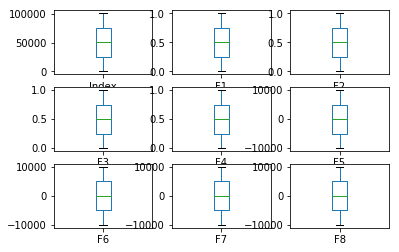

In [375]:
df19=df.iloc[:,0:9]
df19.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
# There seems not Outlier yet

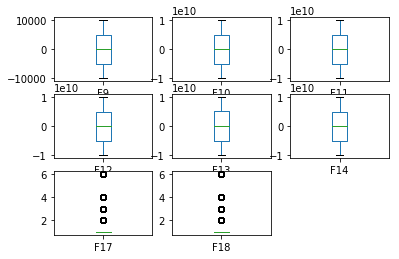

In [376]:
## is there any outlier in the 10st to 18th column
df1018=df.iloc[:,9:19]
df1018.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
# There are outliers in  F17 and F18

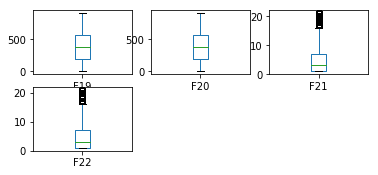

In [377]:
## is there any outlier in the 19st to 23th column
df1923=df.iloc[:,19:23]
df1923.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
# There are outliers in  F21 and F22

## converting the date feature to an ordinal i.e. an integer

In [378]:
import datetime as dt
# for F15
df['F15'] = pd.to_datetime(df['F15'])

df['F15']=df['F15'].map(dt.datetime.toordinal)


In [379]:
# for F16
df['F16'] = pd.to_datetime(df['F16'])

df['F16']=df['F16'].map(dt.datetime.toordinal)

# As the data is imbalanced Upsampling is done


In [380]:
from sklearn.utils import resample

df_majority = df[df.C==0]

df_minority = df[df.C==1]

In [381]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=76353, random_state=123) 


In [382]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.C.value_counts()

1    76353
0    76353
Name: C, dtype: int64

In [383]:
df_upsampled.drop(['Index'],axis=1,inplace=True)
df_upsampled.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,...,-3433637453,725283,727447,2,1,706,305,1,2,0
2,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,...,-8977995005,726114,725332,2,1,703,315,1,4,0
3,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,...,4868760308,723594,727359,1,1,122,304,15,1,0
4,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,...,9757408267,725471,724933,1,1,486,240,1,1,0
5,0.922726,0.600115,0.616261,0.339285,-6554,8770,1065,-9720,5801,6730646544,...,-6662571037,726646,729412,4,1,806,157,6,5,0


# Building a model:

In [384]:
X = df_upsampled.iloc[:,:22].values
y = df_upsampled.iloc[:,22].values
#X=df.iloc[:,:22].values
#y=df.iloc[:,22].values

### Scaling the dataset

In [385]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X)

### Splitting the dataset into train and test

In [386]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=20)

# Model

### Logistic

In [387]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=20,max_iter=100, verbose=0, n_jobs=1)

In [388]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [389]:
y_pred=model.predict(X_test)

In [390]:
model.score(X_test,y_test)

0.6719926658372077

In [391]:
#train
model.score(X_train,y_train)

0.6728659834321077

### xgboost

In [416]:
from xgboost import XGBClassifier


param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 20
model2 = XGBClassifier(learning_rate=0.01,max_depth=5,n_estimators=500 )

In [417]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [418]:
y_pred=model2.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [419]:
model2.score(X_test,y_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6833540698055137

In [420]:
#train
model2.score(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.68757571788743

## NN

In [425]:
#Defining NN Model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import Sequential
model3 = Sequential()

model3.add(Dense(1024, input_dim=22, activation='relu'))

model3.add(Dropout(0.05))

model3.add(Dense(1024, activation='relu'))

model3.add(Dense(1, activation='sigmoid'))



model3.compile(loss='binary_crossentropy',

              optimizer='RMSprop',

              metrics=['accuracy'])



#Training of model

model3.fit(X_train, y_train,

          nb_epoch=20,

          batch_size=512,validation_data=(X_test, y_test),

          shuffle=True,verbose=2)

C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 122164 samples, validate on 30542 samples
Epoch 1/20
 - 17s - loss: 0.6127 - acc: 0.6681 - val_loss: 0.5935 - val_acc: 0.6795
Epoch 2/20
 - 17s - loss: 0.5890 - acc: 0.6814 - val_loss: 0.5911 - val_acc: 0.6793
Epoch 3/20
 - 17s - loss: 0.5804 - acc: 0.6856 - val_loss: 0.5873 - val_acc: 0.6776
Epoch 4/20
 - 18s - loss: 0.5690 - acc: 0.6926 - val_loss: 0.5788 - val_acc: 0.6861
Epoch 5/20
 - 18s - loss: 0.5558 - acc: 0.7023 - val_loss: 0.5748 - val_acc: 0.6864
Epoch 6/20
 - 19s - loss: 0.5394 - acc: 0.7150 - val_loss: 0.5673 - val_acc: 0.6949
Epoch 7/20
 - 18s - loss: 0.5220 - acc: 0.7291 - val_loss: 0.5668 - val_acc: 0.6945
Epoch 8/20
 - 19s - loss: 0.5034 - acc: 0.7430 - val_loss: 0.5500 - val_acc: 0.7076
Epoch 9/20
 - 21s - loss: 0.4858 - acc: 0.7584 - val_loss: 0.5745 - val_acc: 0.7077
Epoch 10/20
 - 18s - loss: 0.4705 - acc: 0.7681 - val_loss: 0.6047 - val_acc: 0.6948
Epoch 11/20
 - 18s - loss: 0.4535 - acc: 0.7804 - val_loss: 0.5202 - val_acc: 0.7341
Epoch 12/20
 - 18s - lo

In [434]:
y_pred = model3.predict_classes(X_test) 

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



[[ 8848  6495]
 [  807 14392]]
             precision    recall  f1-score   support

          0       0.92      0.58      0.71     15343
          1       0.69      0.95      0.80     15199

avg / total       0.80      0.76      0.75     30542



In [433]:
#k-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold

import numpy

seed = 7

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

cvscores = []

for train, test in kfold.split(X, y):

    model = Sequential()

    model.add(Dense(1024, input_dim=22, activation='relu'))

    model.add(Dropout(0.05))

    model.add(Dense(1024, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',

              optimizer='RMSprop',

              metrics=['accuracy'])

    model.fit(X[train], y[train], epochs=20, batch_size=512, verbose=0)

    scores = model.evaluate(X[test], y[test], verbose=0)

    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

    cvscores.append(scores[1] * 100)

    

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

acc: 80.24%
acc: 76.61%
acc: 80.80%
acc: 80.39%
acc: 78.50%
acc: 74.01%
acc: 80.73%
acc: 78.64%
acc: 79.37%
acc: 79.73%
78.90% (+/- 2.03%)
